# CNN识别猫狗

In [40]:
# 依赖导入
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from matplotlib import pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [20]:
# 数据加载
data_generator = ImageDataGenerator(rescale=1/255)
training_set = data_generator.flow_from_directory("/Users/mac/Desktop/chapter3_task1_data/training_set/", 
                                                        target_size=(50, 50), 
                                                        batch_size=32, 
                                                        class_mode="binary")

Found 8000 images belonging to 2 classes.


In [21]:
# 查看数据类型
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [22]:
# 每个批次的样本数量
training_set.batch_size

32

In [23]:
# 加载的图片名称
training_set.filenames

['cats/cats_1.jpg',
 'cats/cats_10.jpg',
 'cats/cats_100.jpg',
 'cats/cats_1000.jpg',
 'cats/cats_1001.jpg',
 'cats/cats_1002.jpg',
 'cats/cats_1003.jpg',
 'cats/cats_1004.jpg',
 'cats/cats_1005.jpg',
 'cats/cats_1006.jpg',
 'cats/cats_1007.jpg',
 'cats/cats_1008.jpg',
 'cats/cats_1009.jpg',
 'cats/cats_101.jpg',
 'cats/cats_1010.jpg',
 'cats/cats_1011.jpg',
 'cats/cats_1012.jpg',
 'cats/cats_1013.jpg',
 'cats/cats_1014.jpg',
 'cats/cats_1015.jpg',
 'cats/cats_1016.jpg',
 'cats/cats_1017.jpg',
 'cats/cats_1018.jpg',
 'cats/cats_1019.jpg',
 'cats/cats_102.jpg',
 'cats/cats_1020.jpg',
 'cats/cats_1021.jpg',
 'cats/cats_1022.jpg',
 'cats/cats_1023.jpg',
 'cats/cats_1024.jpg',
 'cats/cats_1025.jpg',
 'cats/cats_1026.jpg',
 'cats/cats_1027.jpg',
 'cats/cats_1028.jpg',
 'cats/cats_1029.jpg',
 'cats/cats_103.jpg',
 'cats/cats_1030.jpg',
 'cats/cats_1031.jpg',
 'cats/cats_1032.jpg',
 'cats/cats_1033.jpg',
 'cats/cats_1034.jpg',
 'cats/cats_1035.jpg',
 'cats/cats_1036.jpg',
 'cats/cats_1037.jpg

In [24]:
# 确认标签
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [25]:
# training_set[][][]  第一个中括号为第几个批次；第二个中括号为确定输入x还是y；第三个中括号用于确定第几个样本
training_set[5][0]

array([[[[0.12941177, 0.02352941, 0.0509804 ],
         [0.1254902 , 0.04313726, 0.03921569],
         [0.24313727, 0.21960786, 0.15686275],
         ...,
         [0.1137255 , 0.14117648, 0.07058824],
         [0.16078432, 0.20000002, 0.10196079],
         [0.22352943, 0.2901961 , 0.16470589]],

        [[0.18823531, 0.11764707, 0.10980393],
         [0.13333334, 0.16862746, 0.10196079],
         [0.21568629, 0.21960786, 0.14901961],
         ...,
         [0.12941177, 0.16470589, 0.09019608],
         [0.14117648, 0.1764706 , 0.09411766],
         [0.2509804 , 0.32156864, 0.15686275]],

        [[0.13725491, 0.21960786, 0.15294118],
         [0.11764707, 0.16078432, 0.10588236],
         [0.24313727, 0.21960786, 0.17254902],
         ...,
         [0.22352943, 0.23137257, 0.14509805],
         [0.20392159, 0.24313727, 0.09803922],
         [0.26666668, 0.34509805, 0.15294118]],

        ...,

        [[0.38431376, 0.43921572, 0.48235297],
         [0.21176472, 0.20000002, 0.18039216]

In [26]:
training_set[5][1]

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

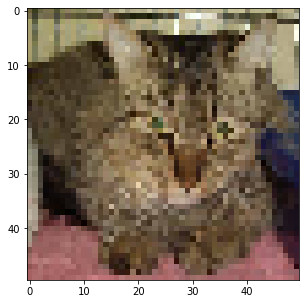

In [27]:
# 可视化第1个批次第一张图片
fig1 = plt.figure(figsize=(5, 5))
plt.imshow(training_set[0][0][0])

In [28]:
# 加载后按批次存放的每个样本对应的索引号
training_set.index_array

array([3777, 4319, 7063, ..., 3736, 6450, 7059])

In [29]:
# 获取文件名称
training_set.filenames[3777]

'cats/cats_799.jpg'

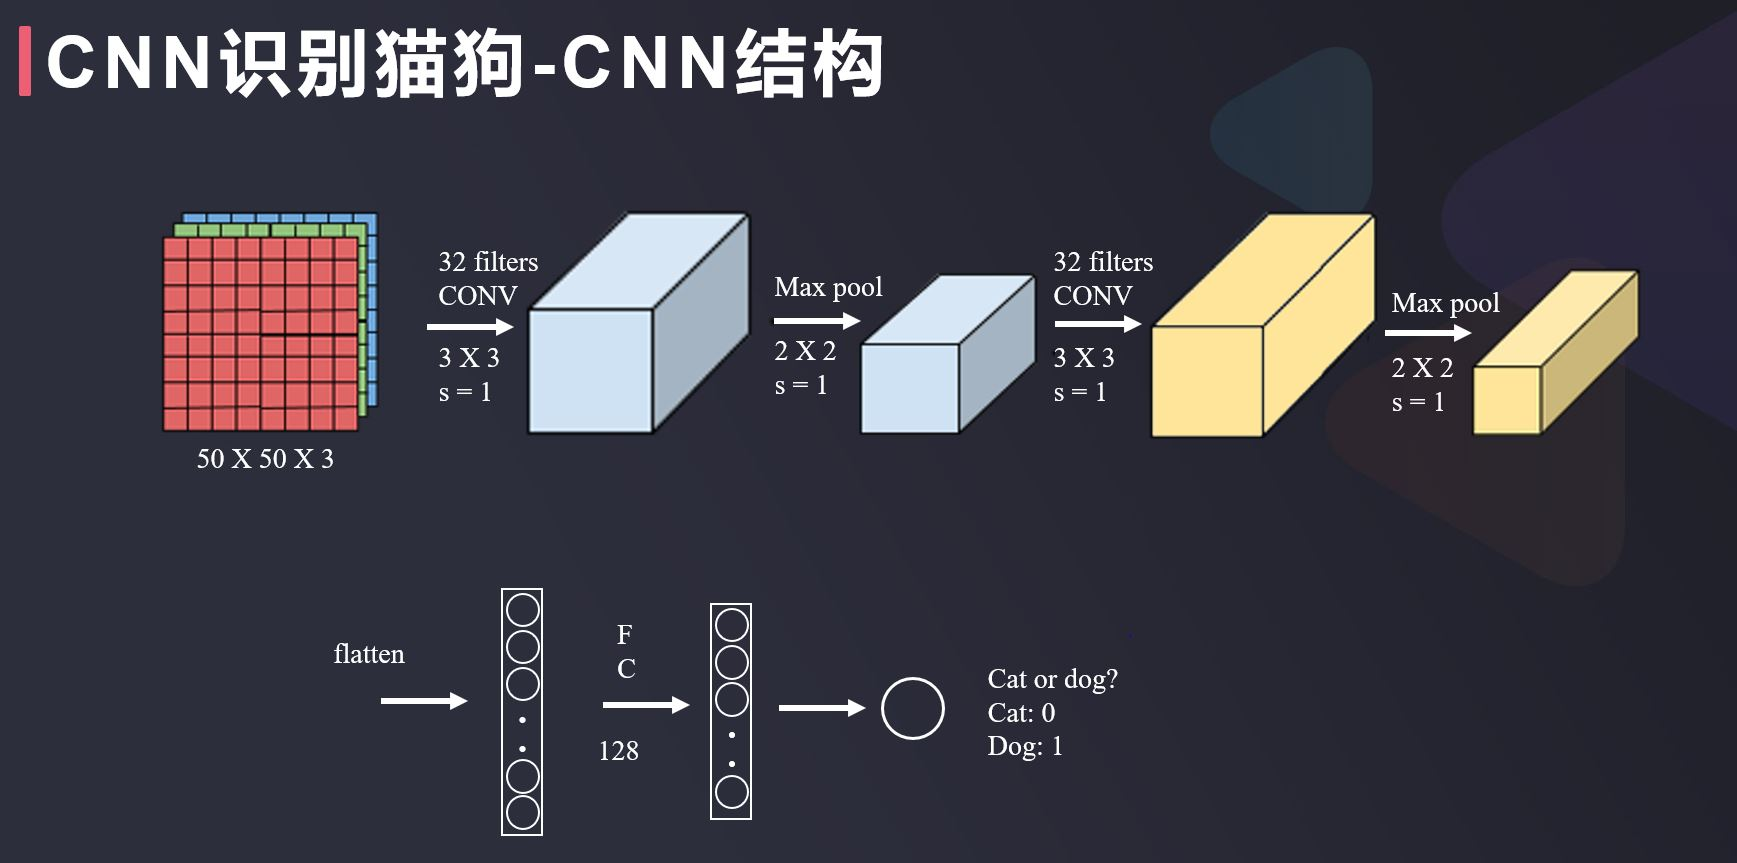

In [30]:
# 建立CNN模型
cnn_model = Sequential()
# 添加卷积层
cnn_model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation="relu"))
# 添加池化层
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
# 添加第二个卷积层
cnn_model.add(Conv2D(32, (3,3), activation="relu"))
# 添加第二个池化层
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
# flatten展开
cnn_model.add(Flatten())
# FC层
cnn_model.add(Dense(units=128, activation="relu"))
# 预测输出层
cnn_model.add(Dense(units=1, activation="sigmoid"))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [31]:
# 模型配置
cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [32]:
# 模型训练
cnn_model.fit_generator(training_set, epochs=20)

Epoch 1/20
250/250 [==============================] - 25s 99ms/step - loss: 0.6663 - accuracy: 0.5911
Epoch 2/20
250/250 [==============================] - 23s 93ms/step - loss: 0.5738 - accuracy: 0.7013
Epoch 3/20
250/250 [==============================] - 27s 106ms/step - loss: 0.5106 - accuracy: 0.7445
Epoch 4/20
250/250 [==============================] - 27s 107ms/step - loss: 0.4765 - accuracy: 0.7726
Epoch 5/20
250/250 [==============================] - 27s 109ms/step - loss: 0.4357 - accuracy: 0.7961
Epoch 6/20
250/250 [==============================] - 27s 110ms/step - loss: 0.3961 - accuracy: 0.8231
Epoch 7/20
250/250 [==============================] - 29s 116ms/step - loss: 0.3624 - accuracy: 0.8367
Epoch 8/20
250/250 [==============================] - 28s 113ms/step - loss: 0.3245 - accuracy: 0.8601
Epoch 9/20
250/250 [==============================] - 27s 108ms/step - loss: 0.2805 - accuracy: 0.8801
Epoch 10/20
250/250 [==============================] - 27s 108ms/step - los

In [33]:
# 训练集数据预测准确率
accuracy_train = cnn_model.evaluate_generator(training_set)
print(accuracy_train)

[0.004291266202926636, 0.9993749856948853]


In [34]:
# 模型存储
cnn_model.save("./task1_practise.h5")

In [35]:
# 模型加载
loaded_model = load_model("./task1_practise.h5")

In [38]:
# 测试数据集准确率评估
test_set = data_generator.flow_from_directory("/Users/mac/Desktop/chapter3_task1_data/test_set/",
                                              target_size=(50, 50), 
                                              batch_size=32, 
                                              class_mode="binary")

Found 2000 images belonging to 2 classes.


In [39]:
accuracy_test = loaded_model.evaluate_generator(test_set)
print(accuracy_test)

[0.5609462261199951, 0.7555000185966492]


In [45]:
# 单张图片的预测
pic1_path = "/Users/mac/Desktop/chapter3_verify/1.png"
pic1 = load_img(pic1_path, target_size=(50, 50))
pic1_array = img_to_array(pic1)
pic1_normal = pic1_array/255
pic1_normal = pic1_normal.reshape(1,50,50,3)

In [48]:
# 预测
result = loaded_model.predict_classes(pic1_normal)
print("dog" if result == 1 else "cat")

dog


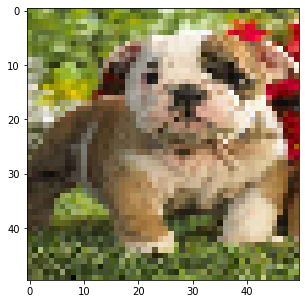

In [50]:
fig2 = plt.figure(figsize=(5,5))
plt.imshow(pic1_normal[0])

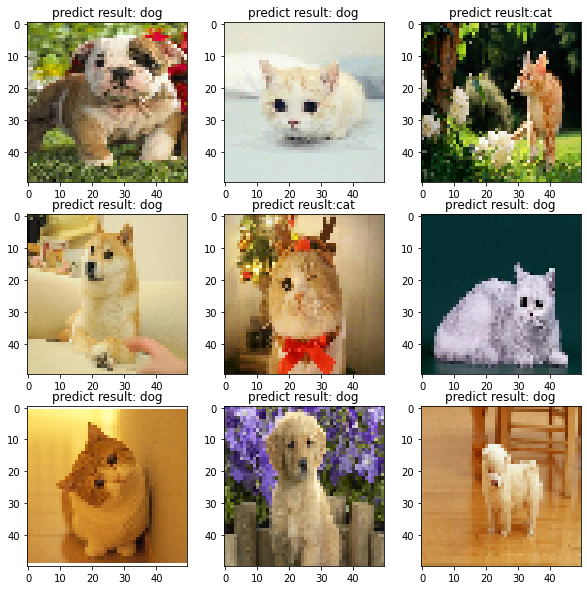

In [54]:
# 本地九张图片处理
fig3 = plt.figure(figsize=(10,10))
for i in range(1,10):
    img_name = "{}.png".format(i)
    pic_path = "/Users/mac/Desktop/chapter3_verify/" + img_name
    pic = load_img(pic_path, target_size=(50, 50))
    pic_array = img_to_array(pic)
    pic_normal = pic_array/255
    pic_normal = pic_normal.reshape(1,50,50,3)
    result = loaded_model.predict_classes(pic_normal)
    plt.subplot(3, 3, i)
    plt.imshow(pic_normal[0])
    plt.title('predict result: dog' if result==1 else 'predict reuslt:cat')
